<a href="https://colab.research.google.com/github/kandelprakashchandra/vis/blob/main/all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is an online place (cloud) for running Python notebooks--we will use it to run our vis :) 

You can just edit and adjust and and run the notebook I gave you [this file!]: don't forget to first save it!!!: File-Save a copy in GitHub

And after adjusting to run with your own data, you can submit it as ps :)

And let's meet one-on-one and make sure we got this working for your own data!

In [ ]:
#get useful libraries
from statistics import *
import pylab as plt
import pandas as pd
import pandas_datareader as pdr
import datetime
from pandas_datareader import wb
import sys
import os 
import re
import urllib  #weird, guess need to have os and pandas imported for this to work                                                  
import string #for annotating pouints in scatter 
                                                                          
import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      
                                                                                       
#from geopy.geocoders import Nominatim #later maybe

import json

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
# pip install geocoder #will do it later maybe

## PANDAS, your lib for all data mgmt and most stats and much vis 


note:  pandas is kind of like stata, or more like r, but not really much like
the rest of python but helps a lot with traditional data

https://towardsdatascience.com/going-from-stata-to-pandas-706888525acf

http://statapython.blogspot.com/

may also see:
http://www.dataschool.io/best-python-pandas-resources/
https://www.dataquest.io/blog/pandas-python-tutorial/

https://pandas.pydata.org/pandas-docs/stable/tutorials.html

tutorials in notebooks (just click on folder and may just go straight to one with solutions
and run them in Python):
https://github.com/guipsamora/pandas_exercises/tree/master/01_Getting_%26_Knowing_Your_Data
https://github.com/guipsamora/pandas_exercises/tree/master/06_Stats
https://github.com/guipsamora/pandas_exercises/tree/master/07_Visualization



many great tutorials for self study:
https://pandas.pydata.org/pandas-docs/stable/tutorials.html

### jan18 loading real data,  csv file, basic descriptive stats                                                                            
any software incl excel and spss can save as csv!                                                                                  
just make sure it is clean: one short alphanumeric header per column,                                                              
                                                                                                                                   
let's do an example, your first ps will be sth like that but using your own data                                                             



In [ ]:
#download file from online and save in colab as ex1.csv
urllib.request.urlretrieve("https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download", "ex1.csv")

('ex1.csv', <http.client.HTTPMessage at 0x7f2a76d5cc40>)

In [ ]:
# basic navigation
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'ex1.csv', 'sample_data']

In [ ]:
dat=pd.read_csv('ex1.csv') #read it in  ; or full path: '/content/ex1.csv'

In [ ]:
dat.columns

Index(['Person', 'Height', 'Self Esteem'], dtype='object')

In [ ]:
dat.head(2)

,Person,Height,Self Esteem
0,1,68,4.1
1,2,71,4.6


In [ ]:
dat #print it out; note it's from: https://conjointly.com/kb/correlation-statistic/

,Person,Height,Self Esteem
0,1,68,4.1
1,2,71,4.6
2,3,62,3.8
3,4,75,4.4
4,5,58,3.2
5,6,60,3.1
6,7,67,3.8
7,8,68,4.1
8,9,71,4.3
9,10,69,3.7


In [ ]:
dat["Height"][0:3]

0    68
1    71
2    62
Name: Height, dtype: int64

In [ ]:
dat[["Height","Self Esteem"]][0:3]

In [ ]:
# if data big take random sample! way better to learn and figure things out with small sample!!
# say frac=.1 for 10perc, or n=10 for 10obs
dat.sample(frac=0.5, replace=False, random_state=1) #random_state to ensure reproducibility of results; 

,Person,Height,Self Esteem
3,4,75,4.4
16,17,65,4.1
6,7,67,3.8
10,11,68,3.5
2,3,62,3.8
14,15,60,3.4
4,5,58,3.2
17,18,67,3.8
7,8,68,4.1
1,2,71,4.6


In [ ]:
dat["Height"]

0     68
1     71
2     62
3     75
4     58
5     60
6     67
7     68
8     71
9     69
10    68
11    67
12    63
13    62
14    60
15    63
16    65
17    67
18    63
19    61
Name: Height, dtype: int64

In [ ]:
dat["Height"].mean() # median, mode, stdev

65.4

In [ ]:
dat["Height"].value_counts() # a crosstab

68    3
67    3
63    3
71    2
62    2
60    2
75    1
58    1
69    1
65    1
61    1
Name: Height, dtype: int64

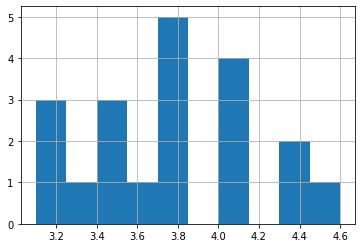

In [ ]:
dat["Self Esteem"].hist()

In [ ]:
pd.crosstab(dat["Height"], dat["Self Esteem"]) #too many numbers for a crosstab!

Self Esteem,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,4.0,4.1,4.3,4.4,4.6
Height,,,,,,,,,,,,,
58,0,1,0,0,0,0,0,0,0,0,0,0,0
60,1,0,0,1,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,1,0,0,0,0,0,0,0
62,0,0,1,0,0,0,0,1,0,0,0,0,0
63,0,0,0,1,0,0,1,0,1,0,0,0,0
65,0,0,0,0,0,0,0,0,0,1,0,0,0
67,0,1,0,0,0,0,0,2,0,0,0,0,0
68,0,0,0,0,1,0,0,0,0,2,0,0,0
69,0,0,0,0,0,0,1,0,0,0,0,0,0


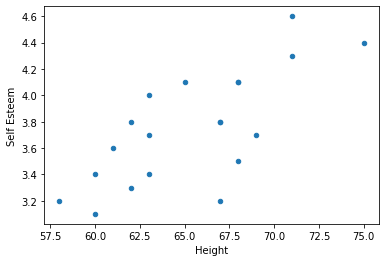

In [ ]:
dat.plot(kind='scatter', y='Self Esteem', x='Height')

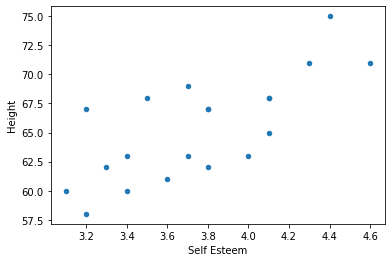

In [ ]:
dat.plot(kind='scatter', y='Height', x='Self Esteem')

In [ ]:
dat[['Height','Self Esteem']].corr()

,Height,Self Esteem
Height,1.000000,0.730636
Self Esteem,0.730636,1.000000


# <font color='red'>>>>will be updated from here on>>></font>

### import/export and des sta stuff as in stata

In [ ]:
urllib.request.urlretrieve("https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download", "auto.dta")
auto=pd.read_stata('auto.dta') 

auto.head(2)
#auto.to_stata('stata.dta')



('auto.dta', <http.client.HTTPMessage at 0x7f9301403dc0>)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic


In [ ]:
auto.to_excel('auto.xlsx', sheet_name = 'testing', index = False)
excelTest1 = pd.read_excel('auto.xlsx', 0)
excelTest1.head(2)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic


In [ ]:
dir(auto) # all the stuff you can do on auto :)
# auto.hist() # eg hist

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex

In [ ]:
dir(auto.price) #and stuff you can do on price var

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__r

In [ ]:
#auto['make'][0] #py counts from zero!
auto['make'][0:5]

0      AMC Concord
1        AMC Pacer
2       AMC Spirit
3    Buick Century
4    Buick Electra
Name: make, dtype: object

In [ ]:
max(auto['mpg'])
print() #just add space
min(auto['mpg'])
#auto['mpg'].max()
#auto['mpg'].min()
#auto['mpg'].median()
#auto['mpg'].mean()
#auto['mpg'].std()

41

12

In [ ]:
auto.make[auto.mpg<18] 
#auto['make'][auto['mpg']<18] 


1             AMC Pacer
4         Buick Electra
8         Buick Riviera
10         Cad. Deville
11        Cad. Eldorado
14         Chev. Impala
21         Dodge Magnum
22      Dodge St. Regis
25    Linc. Continental
26         Linc. Mark V
27     Linc. Versailles
29         Merc. Cougar
30        Merc. Marquis
32           Merc. XR-7
40        Olds Toronado
52            Audi 5000
63          Peugeot 604
73            Volvo 260
Name: make, dtype: object

In [ ]:
#len(auto) #stata: count
auto.shape #74 obs, 12 vars

(74, 12)

In [ ]:
auto.dtypes #stata: des ; BUT note no str but object and category

make              object
price              int16
mpg                int16
rep78            float64
headroom         float32
trunk              int16
weight             int16
length             int16
turn               int16
displacement       int16
gear_ratio       float32
foreign         category
dtype: object

In [ ]:
auto.make[0:5] #note dtype

0      AMC Concord
1        AMC Pacer
2       AMC Spirit
3    Buick Century
4    Buick Electra
Name: make, dtype: object

In [ ]:
auto.foreign[0:5] #note dtype and categories

0    Domestic
1    Domestic
2    Domestic
3    Domestic
4    Domestic
Name: foreign, dtype: category
Categories (2, object): ['Domestic' < 'Foreign']

In [ ]:
# missing data

auto['rep78'].isnull().sum()
print()
#auto.loc[auto['rep78'].isnull()]
#http://pandas.pydata.org/pandas-docs/stable/missing_data.html
#auto[auto.rep78.isnull()][['rep78']] #NaN stands for missing
#stata: l make price mpg rep78 foreign if rep78==.
auto[auto.rep78.isnull()][['make', 'price', 'mpg', 'rep78', 'foreign']] #missing on rep78

##auto['rep78'][0:3]

##auto['rep78'][0:3].notnull()

#https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
##data.replace(to_replace = np.nan, value = -99) 

#auto['rep78'].value_counts() #doesn't show missing
#print(auto['rep78'].to_string()) #print all rows



5

,make,price,mpg,rep78,foreign
2,AMC Spirit,3799,22,NaN,Domestic
6,Buick Opel,4453,26,NaN,Domestic
44,Plym. Sapporo,6486,26,NaN,Domestic
50,Pont. Phoenix,4424,19,NaN,Domestic
63,Peugeot 604,12990,14,NaN,Foreign


In [ ]:
# tostring, destring
auto['mpgST'] = auto.mpg.astype(object)
#auto[['mpg','mpgST']][0:2]
#auto[['mpg','mpgST']].dtypes
auto['mpgNU'] = auto.mpgST.astype(float)
auto[['mpg','mpgST','mpgNU']][0:2]
auto[['mpg','mpgST','mpgNU']].dtypes #.fillna()

,mpg,mpgST,mpgNU
0,22,22,22.0
1,17,17,17.0


mpg        int16
mpgST     object
mpgNU    float64
dtype: object

In [ ]:
#auto.describe() #stata: sum
auto.describe().T #T just transposes

,count,mean,std,min,25%,50%,75%,max
price,74.0,6165.256757,2949.495885,3291.00,4220.25,5006.500,6332.2500,15906.00
mpg,74.0,21.297297,5.785503,12.00,18.00,20.000,24.7500,41.00
rep78,69.0,3.405797,0.989932,1.00,3.00,3.000,4.0000,5.00
headroom,74.0,2.993243,0.845995,1.50,2.50,3.000,3.5000,5.00
trunk,74.0,13.756757,4.277404,5.00,10.25,14.000,16.7500,23.00
weight,74.0,3019.459459,777.193567,1760.00,2250.00,3190.000,3600.0000,4840.00
length,74.0,187.932432,22.266340,142.00,170.00,192.500,203.7500,233.00
turn,74.0,39.648649,4.399354,31.00,36.00,40.000,43.0000,51.00
displacement,74.0,197.297297,91.837219,79.00,119.00,196.000,245.2500,425.00
gear_ratio,74.0,3.014865,0.456287,2.19,2.73,2.955,3.3525,3.89


In [ ]:
auto[['price','mpg','foreign']].groupby('foreign').describe()

price                                                            \
         count         mean          std     min     25%     50%     75%   
foreign                                                                    
Domestic  52.0  6072.423077  3097.104279  3291.0  4185.5  4782.5  6199.5   
Foreign   22.0  6384.681818  2621.915083  3748.0  4521.5  5759.0  7067.5   

                    mpg                                                      
              max count       mean       std   min    25%   50%   75%   max  
foreign                                                                      
Domestic  15906.0  52.0  19.826923  4.743297  12.0  16.75  19.0  22.0  34.0  
Foreign   12990.0  22.0  24.772727  6.611187  14.0  21.00  24.5  27.5  41.0

In [ ]:
#stata: l make price mpg rep78 foreign in 1/5'
auto[['make', 'price', 'mpg', 'rep78', 'foreign']].head(3) #first 3 obs

,make,price,mpg,rep78,foreign
0,AMC Concord,4099,22,3.0,Domestic
1,AMC Pacer,4749,17,3.0,Domestic
2,AMC Spirit,3799,22,NaN,Domestic


In [ ]:
auto.sort_values(by='mpg')[['mpg','make','price']][0:3]

,mpg,make,price
26,12,Linc. Mark V,13594
25,12,Linc. Continental,11497
29,14,Merc. Cougar,5379


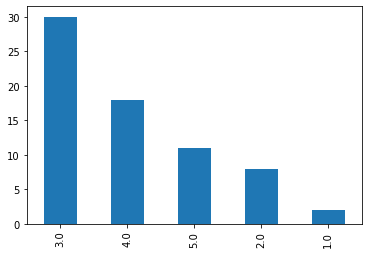

In [ ]:
# stata: ta rep78, plot //remember stata can do plot too of tab in ascii
#auto.groupby('rep78').count()
#auto['rep78'].value_counts()
auto['rep78'].value_counts().plot(kind='bar')

In [ ]:
# stata: ta rep78 foreign
pd.crosstab(auto.rep78, auto.foreign) # crosstab
#pd.crosstab(auto.rep78, auto.foreign,normalize='columns') # col prop (normalize columns)
#pd.crosstab(auto.rep78, auto.foreign,normalize='index') #row prop (normalize rows)
#pd.crosstab(auto.rep78, auto.foreign,normalize='all') #cell prop

foreign,Domestic,Foreign
rep78,,
1.0,2,0
2.0,8,0
3.0,27,3
4.0,9,9
5.0,2,9


In [ ]:
#stata: bys foreign: sum mpg
auto.groupby(by=auto.foreign)['mpg'].mean().round(2) #mean by foreign

foreign
Domestic    19.83
Foreign     24.77
Name: mpg, dtype: float64

Text(2930, 22, 'AMC Concord')

Text(3350, 17, 'AMC Pacer')

Text(2640, 22, 'AMC Spirit')

Text(3250, 20, 'Buick Century')

Text(4080, 15, 'Buick Electra')

Text(3670, 18, 'Buick LeSabre')

Text(2230, 26, 'Buick Opel')

Text(3280, 20, 'Buick Regal')

Text(3880, 16, 'Buick Riviera')

Text(3400, 19, 'Buick Skylark')

Text(4330, 14, 'Cad. Deville')

Text(3900, 14, 'Cad. Eldorado')

Text(4290, 21, 'Cad. Seville')

Text(2110, 29, 'Chev. Chevette')

Text(3690, 16, 'Chev. Impala')

Text(3180, 22, 'Chev. Malibu')

Text(3220, 22, 'Chev. Monte Carlo')

Text(2750, 24, 'Chev. Monza')

Text(3430, 19, 'Chev. Nova')

Text(2120, 30, 'Dodge Colt')

Text(3600, 18, 'Dodge Diplomat')

Text(3600, 16, 'Dodge Magnum')

Text(3740, 17, 'Dodge St. Regis')

Text(1800, 28, 'Ford Fiesta')

Text(2650, 21, 'Ford Mustang')

Text(4840, 12, 'Linc. Continental')

Text(4720, 12, 'Linc. Mark V')

Text(3830, 14, 'Linc. Versailles')

Text(2580, 22, 'Merc. Bobcat')

Text(4060, 14, 'Merc. Cougar')

Text(3720, 15, 'Merc. Marquis')

Text(3370, 18, 'Merc. Monarch')

Text(4130, 14, 'Merc. XR-7')

Text(2830, 20, 'Merc. Zephyr')

Text(4060, 21, 'Olds 98')

Text(3310, 19, 'Olds Cutl Supr')

Text(3300, 19, 'Olds Cutlass')

Text(3690, 18, 'Olds Delta 88')

Text(3370, 19, 'Olds Omega')

Text(2730, 24, 'Olds Starfire')

Text(4030, 16, 'Olds Toronado')

Text(3260, 28, 'Plym. Arrow')

Text(1800, 34, 'Plym. Champ')

Text(2200, 25, 'Plym. Horizon')

Text(2520, 26, 'Plym. Sapporo')

Text(3330, 18, 'Plym. Volare')

Text(3700, 18, 'Pont. Catalina')

Text(3470, 18, 'Pont. Firebird')

Text(3210, 19, 'Pont. Grand Prix')

Text(3200, 19, 'Pont. Le Mans')

Text(3420, 19, 'Pont. Phoenix')

Text(2690, 24, 'Pont. Sunbird')

Text(2830, 17, 'Audi 5000')

Text(2070, 23, 'Audi Fox')

Text(2650, 25, 'BMW 320i')

Text(2370, 23, 'Datsun 200')

Text(2020, 35, 'Datsun 210')

Text(2280, 24, 'Datsun 510')

Text(2750, 21, 'Datsun 810')

Text(2130, 21, 'Fiat Strada')

Text(2240, 25, 'Honda Accord')

Text(1760, 28, 'Honda Civic')

Text(1980, 30, 'Mazda GLC')

Text(3420, 14, 'Peugeot 604')

Text(1830, 26, 'Renault Le Car')

Text(2050, 35, 'Subaru')

Text(2410, 18, 'Toyota Celica')

Text(2200, 31, 'Toyota Corolla')

Text(2670, 18, 'Toyota Corona')

Text(2160, 23, 'VW Dasher')

Text(2040, 41, 'VW Diesel')

Text(1930, 25, 'VW Rabbit')

Text(1990, 25, 'VW Scirocco')

Text(3170, 17, 'Volvo 260')

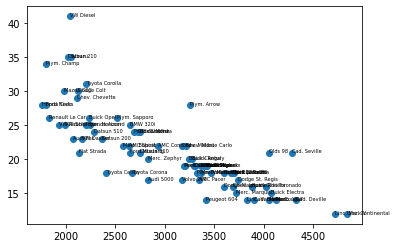

In [ ]:
#stata: corr mpg wei
#auto.mpg.corr(auto.weight) 
#auto[['mpg','weight']].corr() #corr matrix
#auto.plot(kind='scatter', y='mpg', x='weight')  #scatterplot

#scatterplot with labels :)
fig, ax = plt.subplots()
ax.scatter(auto['weight'],auto['mpg'] )
for i, txt in enumerate(auto['make']):
    ax.annotate(txt, (auto['weight'][i],auto['mpg'][i]),fontsize=5)
plt.savefig('fig.pdf')

### manipulating data as in stata


In [ ]:
#stata: ren mpg newMpg
auto = auto.rename(columns={'mpg': 'newMpg', 'make': 'newMake'}) #ren var
auto.dtypes

newMake           object
price              int16
newMpg             int16
rep78            float64
headroom         float32
trunk              int16
weight             int16
length             int16
turn               int16
displacement       int16
gear_ratio       float32
foreign         category
mpgST             object
mpgNU            float64
dtype: object

In [ ]:
#stata: drop newMpg
del auto['newMpg']

In [ ]:
#new vars
auto['colOfOnes'] = 1
#auto['colOfOnes']
auto['colOfOnes'][0:4]

0    1
1    1
2    1
3    1
Name: colOfOnes, dtype: int64

In [ ]:
auto.at[1,'colOfOnes'] = 10 #https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe
auto['colOfOnes'][0:5]

0     1
1    10
2     1
3     1
4     1
Name: colOfOnes, dtype: int64

In [ ]:
auto['colOfOnes'].replace(1,2,inplace=True)
auto['colOfOnes'][0:5]


0     2
1    10
2     2
3     2
4     2
Name: colOfOnes, dtype: int64

In [ ]:
# can also replace more than one at once, eg
# data['sex'].replace([0,1],['Female','Male'],inplace=True)
# see https://stackoverflow.com/questions/31888871/pandas-replacing-column-values
#auto.replace(-999,np.nan,inplace=True) #replace all -999 with missing
#auto.fillna('-', inplace=True) #replace missing with '-'

#this is super useful to get rid of missing just keep finite stuff duh!!
#auto = auto[np.isfinite(auto['colOfOnes'])]
#auto.reset_index(inplace=True) #sometimes things go wrong bc index is not reset!

In [ ]:
#auto.loc[auto['colOfOnes'] <5, 'colOfOnes']  = '22'
auto.loc[auto['foreign'] =='Domestic', 'colOfOnes']  = '100'
auto[['foreign','colOfOnes']][45:55]

,foreign,colOfOnes
45,Domestic,100
46,Domestic,100
47,Domestic,100
48,Domestic,100
49,Domestic,100
50,Domestic,100
51,Domestic,100
52,Foreign,1
53,Foreign,1
54,Foreign,1


In [ ]:
#this is really cool: by sort egen mean count lol
#df[['col1', 'col2', 'col3', 'col4']].groupby(['col1', 'col2']).agg(['mean', 'count'])

In [ ]:
#subsetting
'''
l weight in 1
l weight in 1/3
di weight[1]
'''
#auto['weight'][0] #note that py counts from zero!
#auto['weight'][0:3] 
#auto[['weight', 'length']][0:3]   #note that need to double [[ ]]

# can subset on condition
#df3[(df3['real_name'] = 'Steven Balin')]
#df.loc[df['column_name'] == some_value]
auto.loc[auto['foreign'] =='Domestic']

,newMake,price,newMpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,colOfOnes
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic,100
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic,100
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic,100
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic,100
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic,100
5,Buick LeSabre,5788,18,3.0,4.0,21,3670,218,43,231,2.73,Domestic,100
6,Buick Opel,4453,26,NaN,3.0,10,2230,170,34,304,2.87,Domestic,100
7,Buick Regal,5189,20,3.0,2.0,16,3280,200,42,196,2.93,Domestic,100
8,Buick Riviera,10372,16,3.0,3.5,17,3880,207,43,231,2.93,Domestic,100
9,Buick Skylark,4082,19,3.0,3.5,13,3400,200,42,231,3.08,Domestic,100


### labelling 

i'd just have nice descriptive var names, ditch labels; and for val labels just have another var with labels

other ideas
https://stackoverflow.com/questions/60498830/view-stata-variable-labels-in-pandas
https://stackoverflow.com/questions/22500108/value-label-in-pandas
https://stackoverflow.com/questions/60805100/any-way-to-label-variables-in-python


LATER/TODO--see pandas docs

Value Labels: Python doesn't have value labels, but it has something even more useful, dicts.  
(I suspect that, under the covers, Stata is using hashes, which is what dicts really are, for value labels.  
The idea is to use a dict to map some or all of the values for a variable. 



In [ ]:
# var labels
itr = pd.read_stata('auto.dta', iterator=True)
itr.variable_labels()

{'displacement': 'Displacement (cu. in.)',
 'foreign': 'Car type',
 'gear_ratio': 'Gear Ratio',
 'headroom': 'Headroom (in.)',
 'length': 'Length (in.)',
 'make': 'Make and Model',
 'mpg': 'Mileage (mpg)',
 'price': 'Price',
 'rep78': 'Repair Record 1978',
 'trunk': 'Trunk space (cu. ft.)',
 'turn': 'Turn Circle (ft.) ',
 'weight': 'Weight (lbs.)'}

In [ ]:
a=pd.read_stata('auto.dta',convert_categoricals='False') #didnt work
a['foreign'][0:10] #right so have value labels; to have values, save from stata without value labels

0    Domestic
1    Domestic
2    Domestic
3    Domestic
4    Domestic
5    Domestic
6    Domestic
7    Domestic
8    Domestic
9    Domestic
Name: foreign, dtype: category
Categories (2, object): ['Domestic' < 'Foreign']

### append/merge http://pandas.pydata.org/pandas-docs/stable/merging.html


In [ ]:
#make some dataset
d1 = pd.DataFrame({'id': ['1',  '2',  '3',  '4'],
                   'A': ['A0', 'A1', 'A2', 'A3'],
                   'B': ['B0', 'B1', 'B2', 'B3']
                   })


d2 = pd.DataFrame({'id': ['1', '2', '5', '6'],
                   'A': ['A4', 'A5', 'A6', 'A7'],
                   'C': ['C4', 'C5', 'C6', 'C7']
                   })


d1
d2

,id,A,B
0,1,A0,B0
1,2,A1,B1
2,3,A2,B2
3,4,A3,B3


,id,A,C
0,1,A4,C4
1,2,A5,C5
2,5,A6,C6
3,6,A7,C7


In [ ]:
appended = pd.concat([d1, d2])
appended

,id,A,B,C
0,1,A0,B0,NaN
1,2,A1,B1,NaN
2,3,A2,B2,NaN
3,4,A3,B3,NaN
0,1,A4,NaN,C4
1,2,A5,NaN,C5
2,5,A6,NaN,C6
3,6,A7,NaN,C7


In [ ]:
mergedOuter = pd.merge(d1, d2, how='outer', on=['id']) #outer=keep all
mergedOuter

,id,A_x,B,A_y,C
0,1,A0,B0,A4,C4
1,2,A1,B1,A5,C5
2,3,A2,B2,NaN,NaN
3,4,A3,B3,NaN,NaN
4,5,NaN,NaN,A6,C6
5,6,NaN,NaN,A7,C7


In [ ]:
mergedInner = pd.merge(d1, d2, how='inner', on=['id']) #inner=keep match
mergedInner

,id,A_x,B,A_y,C
0,1,A0,B0,A4,C4
1,2,A1,B1,A5,C5


In [ ]:
mergedLeft = pd.merge(d1, d2, how='left', on=['id']) #left=keep all from 1st
mergedLeft

,id,A_x,B,A_y,C
0,1,A0,B0,A4,C4
1,2,A1,B1,A5,C5
2,3,A2,B2,NaN,NaN
3,4,A3,B3,NaN,NaN


In [ ]:
mergedRight = pd.merge(d1, d2, how='right', on=['id']) #right=keep all from 2nd
mergedRight

,id,A_x,B,A_y,C
0,1,A0,B0,A4,C4
1,2,A1,B1,A5,C5
2,5,NaN,NaN,A6,C6
3,6,NaN,NaN,A7,C7


### reshape


In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.wide_to_long.html
#pd.wide_to_long(df, ['x'], i='i', j='j')

#or maybe better pivot:
#https://www.datasciencemadesimple.com/reshape-long-wide-pandas-python-pivot-function/
#https://www.statology.org/pandas-long-to-wide/
#https://towardsdatascience.com/reshape-pandas-dataframe-with-pivot-table-in-python-tutorial-and-visualization-2248c2012a31

## API (pulling data straight from Fed and World Bank) and basic graphs
Graphs are the best way to understand data and convey information! And Python comes with two handy packages to pull data straight from Fed (for students interested in domestic stuff) and from World Bank (for folks with intl interests)

#### Fed/FRED

Let's start with Fed, can browse categories or search at [https://fred.stlouisfed.org/categories](https://fred.stlouisfed.org/categories), say we're interested in effect of covid on payrolls: search for 'nonfarm payrolls', and first hit is 'All Employees, Total Nonfarm', click that and can download graph from there or pull data to Py:

In [ ]:
start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader('PAYEMS', 'fred', start, end) 
# PAYEMS is the code for series: you know it from fed's url: https://fred.stlouisfed.org/series/PAYEMS 

In [ ]:
df #print the data

,PAYEMS
DATE,
2005-05-01,133690
2005-06-01,133942
2005-07-01,134296
2005-08-01,134498
2005-09-01,134566
...,...
2021-02-01,143727
2021-03-01,144431
2021-04-01,144694


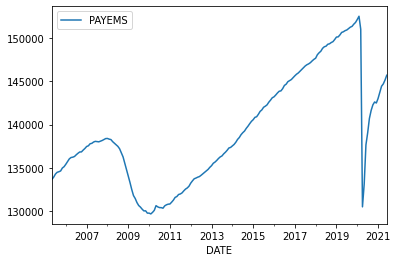

In [ ]:
df.plot() #plot the data then can right click the image-Copy and Paste into your doc 

How about job losses? Search for 'job losses on layoff' yields LNS13023653 and 'Permanent Job Losers' is LNS13026638, so:

In [ ]:
start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader(['LNS13023653', 'LNS13026638'],
                    'fred', start, end)
df=df.rename(columns={"LNS13023653": "job losses on layoff", "LNS13026638": "perm job losses"})

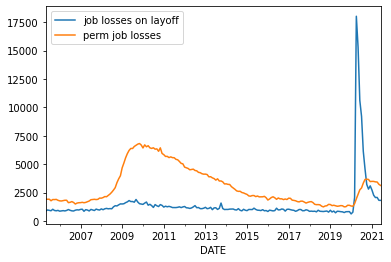

In [ ]:
df.plot()

What about a cross-section, say unemployment rate across NJ counties? Search for 'Unemployment Rate Atlantic County NJ' gets NJATLA2URN, and ''Unemployment Rate Atlantic County NJ' gets
NJCUMB2URN, so:


In [ ]:
start = datetime.datetime (2019, 6, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN'],
                    'fred', start, end)
df=df.rename(columns={"NJATLA2URN": "unemp atl", "NJCUMB2URN": "unemp cum"})

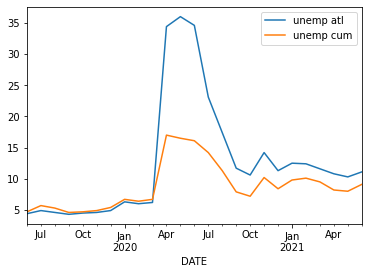

In [ ]:
df.plot()

Wow Atl got hit hard! Must be casinos, hotels, and dining! How about let's compare all of SJ at one point in time! So add few other counties:

NJATLA2URN atl

NJCUMB2URN cumberland

NJSALE5URN salem

NJGLOU5URN gloucester

NJCAMD7URN camden

NJBURL0URN burlington

NJCAPE1URN cape may

NJOCEA5URN ocean

And lets do pre-pandemic and after pandemic

In [ ]:
start = datetime.datetime (2019, 6, 1)
end = datetime.datetime (2019, 6, 1)

dfPre = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN','NJSALE5URN','NJGLOU5URN',
                        'NJCAMD7URN','NJBURL0URN','NJCAPE1URN','NJOCEA5URN' ],
                    'fred', start, end)
dfPre=dfPre.rename(columns={"NJATLA2URN":"atl",
                            "NJCUMB2URN":"cum",
                            "NJSALE5URN":"sal",
                            "NJGLOU5URN":"glo",
                            "NJCAMD7URN":"cam",
                            "NJBURL0URN":"bur",
                            "NJCAPE1URN":"cap may",
                            "NJOCEA5URN":"ocean"
                            })

#below is the same just 2020, and called "Post"
start = datetime.datetime (2020, 6, 1)
end = datetime.datetime (2020, 6, 1)

dfPost = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN','NJSALE5URN','NJGLOU5URN',
                        'NJCAMD7URN','NJBURL0URN','NJCAPE1URN','NJOCEA5URN' ],
                    'fred', start, end)
dfPost=dfPost.rename(columns={"NJATLA2URN":"atl",
                            "NJCUMB2URN":"cum",
                            "NJSALE5URN":"sal",
                            "NJGLOU5URN":"glo",
                            "NJCAMD7URN":"cam",
                            "NJBURL0URN":"bur",
                            "NJCAPE1URN":"cap may",
                            "NJOCEA5URN":"ocean"
                            })

In [ ]:
dfPre

,atl,cum,sal,glo,cam,bur,cap may,ocean
DATE,,,,,,,,
2019-06-01,4.4,4.7,4.4,3.4,3.8,3.0,4.2,3.2


[]

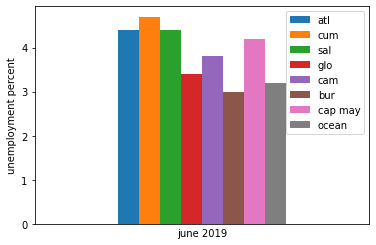

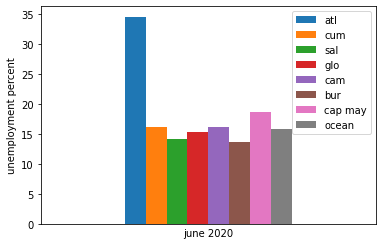

In [ ]:
ax=dfPre.plot(kind="bar")
ax.set(xlabel="june 2019", ylabel="unemployment percent")
ax.set_xticks([])

ax=dfPost.plot(kind="bar")
ax.set(xlabel="june 2020", ylabel="unemployment percent")
ax.set_xticks([])

Interesting! Looks like there were similar adn then atl shot up; but remember about scaling of y axis!, if you make moth same scale:


[]

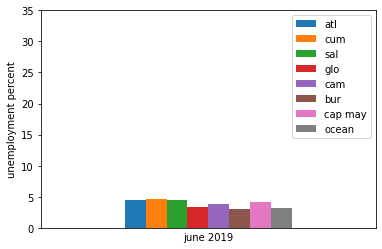

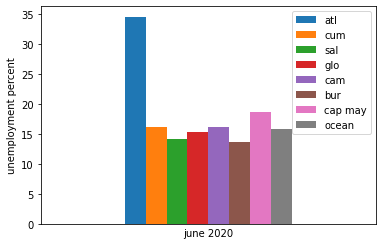

In [ ]:
ax=dfPre.plot(kind="bar")
ax.set(xlabel="june 2019", ylabel="unemployment percent")
ax.set_xticks([])
ax.set_ylim(0,35)

ax=dfPost.plot(kind="bar")
ax.set(xlabel="june 2020", ylabel="unemployment percent")
ax.set_xticks([])



#### World Bank
can actually search within python :)

In [ ]:
pdr.wb.search('gdp.*capita.*const')

,id,name,unit,source,sourceNote,sourceOrganization,topics
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
10411,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10413,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10415,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
10416,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [ ]:
dat = pdr.wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2015).stack().unstack(0)

In [ ]:
datNoInd=dat
datNoInd.index=dat.index.droplevel(-1)
datNoInd

country,Canada,Mexico,United States
year,,,
2005,38573.199765,8877.851291,52796.089816
2006,39776.179473,9142.804774,53782.297288
2007,42097.435120,9214.353534,54272.719553
2008,42063.633052,9181.399967,53688.365135
2009,40368.292037,8568.618149,51869.706308
2010,41155.323638,8878.561377,52759.998081
2011,42036.997844,9076.301453,53190.231121
2012,42315.807389,9280.258638,53989.248340
2013,42846.284196,9282.991933,54604.130054


Text(0.5, 1.0, 'my title')

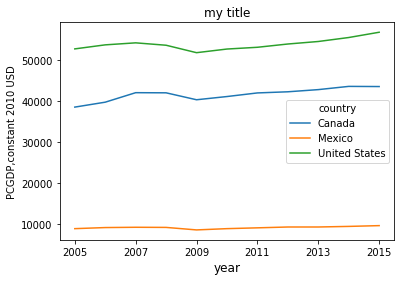

In [ ]:
ax=datNoInd.plot()
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('PCGDP,constant 2010 USD', fontsize=10)
ax.set_title('my title')

Now imagine you want to compare GDP to the Unemployment rate.

In [ ]:
pdr.wb.search('unemp.*').iloc[:,:2]

,id,name
947,9.0.Unemp.All,Unemployed (%)
948,9.0.Unemp.B40,Unemployed-Bottom 40 Percent (%)
949,9.0.Unemp.T60,Unemployed-Top 60 Percent (%)
965,9.1.Unemp.All,"Unemployed (%), Male"
966,9.1.Unemp.B40,"Unemployed-Bottom 40 Percent (%), Male"
...,...,...
17761,per_lm_alllm.cov_q1_tot,Coverage of unemployment benefits and ALMP in ...
17765,per_lm_alllm.cov_q2_tot,Coverage of unemployment benefits and ALMP in ...
17769,per_lm_alllm.cov_q3_tot,Coverage of unemployment benefits and ALMP in ...
17773,per_lm_alllm.cov_q4_tot,Coverage of unemployment benefits and ALMP in ...


In [ ]:
dat = pdr.wb.download(indicator=['NY.GDP.PCAP.KD','SL.UEM.TOTL.NE.ZS'], country=['US', 'CA', 'MX'], start=2015, end=2020)

In [ ]:
dat

NY.GDP.PCAP.KD  SL.UEM.TOTL.NE.ZS
country       year                                   
Canada        2020    42294.234573               9.46
              2019    45118.659098               5.66
              2018    44917.369814               5.83
              2017    44325.416776               6.34
              2016    43536.913403               7.00
              2015    43596.135537               6.91
Mexico        2020     8909.677654               4.45
              2019     9820.448553               3.48
              2018     9945.776845               3.28
              2017     9842.400712               3.42
              2016     9751.569083               3.86
              2015     9616.645558               4.31
United States 2020    58559.674513               8.05
              2019    60836.771454               3.67
              2018    59821.592274               3.90
              2017    58387.775808               4.36
              2016    57418.933846               4.87
              2015    56863.371496               5.28

In [ ]:
#lets sort it by year within each country
dat=dat.sort_values(['country', 'year'], ascending=[True, True])
dat

NY.GDP.PCAP.KD  SL.UEM.TOTL.NE.ZS
country       year                                   
Canada        2015    43596.135537               6.91
              2016    43536.913403               7.00
              2017    44325.416776               6.34
              2018    44917.369814               5.83
              2019    45118.659098               5.66
              2020    42294.234573               9.46
Mexico        2015     9616.645558               4.31
              2016     9751.569083               3.86
              2017     9842.400712               3.42
              2018     9945.776845               3.28
              2019     9820.448553               3.48
              2020     8909.677654               4.45
United States 2015    56863.371496               5.28
              2016    57418.933846               4.87
              2017    58387.775808               4.36
              2018    59821.592274               3.90
              2019    60836.771454               3.67
              2020    58559.674513               8.05

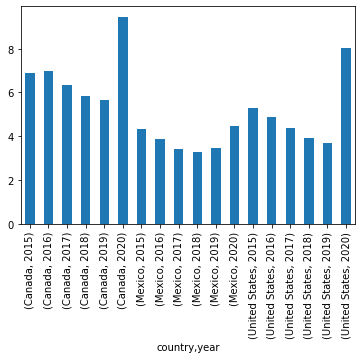

In [ ]:
ax=dat['SL.UEM.TOTL.NE.ZS'].plot(kind="bar")


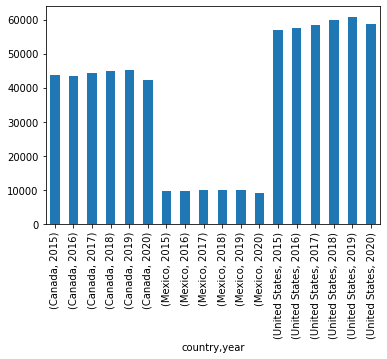

In [ ]:
ax=dat['NY.GDP.PCAP.KD'].plot(kind="bar")


## ols regression

In [ ]:
#example of age and fear from slides; not results little different 
#as i had sligtly different input numbers
import pandas as pd
import statsmodels.formula.api as sm
df = pd.DataFrame({"age": [23,38,48,57,72], "fear": [2,6,6,14,11]})
result = sm.ols(formula="fear ~ age", data=df).fit()
print(result.summary())

#LATER TODO nice sns vis https://seaborn.pydata.org/tutorial/regression.html
#nice overview for beginners https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                   fear   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     7.432
Date:                Thu, 14 Apr 2022   Prob (F-statistic):             0.0722
Time:                        23:22:48   Log-Likelihood:                -11.171
No. Observations:                   5   AIC:                             26.34
Df Residuals:                       3   BIC:                             25.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3872      3.958     -0.603      0.5

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [ ]:
# wages example: fist download the dataset from:
# https://sites.google.com/site/adamokuliczkozaryn/adv_reg/wages.csv
# then uplodad to the colab: 
# click folder on the right toolbar and upload the file to sampple_data
#df = pd.read_csv('sample_data/wages.csv') #read data
# or:
df = pd.read_csv('https://sites.google.com/site/adamokuliczkozaryn/adv_reg/wages.csv')
df.dtypes #have a look


Unnamed: 0      int64
wage          float64
educ            int64
exp             int64
union          object
nonwhite       object
hispanic       object
female         object
married        object
south          object
_est_logit      int64
dtype: object

In [ ]:
df.head(10) #print the first 10 obs

,Unnamed: 0,wage,educ,exp,union,nonwhite,hispanic,female,married,south,_est_logit
0,0,4.9998,12,4,no,no,no,male,no,yes,1
1,1,17.2500,18,5,no,no,no,male,yes,no,1
2,2,9.8601,15,13,no,no,no,male,yes,no,1
3,3,14.9990,12,39,yes,no,no,male,yes,no,1
4,4,4.0000,12,4,no,no,no,male,no,no,1
5,5,14.0010,11,13,yes,no,no,male,yes,no,1
6,6,16.4250,14,19,no,no,no,male,no,no,1
7,7,10.5000,12,4,yes,no,no,male,yes,no,1
8,8,20.5510,12,33,no,no,no,male,yes,no,1
9,9,6.5000,12,5,no,no,no,male,no,yes,1


In [ ]:
df[['wage','educ','exp']].describe()

,wage,educ,exp
count,534.000000,534.000000,534.000000
mean,9.023939,13.018727,17.822097
std,5.138876,2.615373,12.379710
min,1.000000,2.000000,0.000000
25%,5.249900,12.000000,8.000000
50%,7.778000,12.000000,15.000000
75%,11.250000,15.000000,26.000000
max,44.500000,18.000000,55.000000


In [ ]:
df.corr()

,age,fear
age,1.000000,0.844053
fear,0.844053,1.000000


In [ ]:
result = sm.ols(formula="wage ~ educ + exp + married", data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     45.45
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           3.78e-26
Time:                        23:23:37   Log-Likelihood:                -1570.2
No. Observations:                 534   AIC:                             3148.
Df Residuals:                     530   BIC:                             3165.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.0704      1.225     -4.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


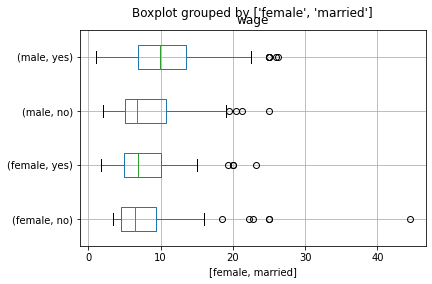

(<matplotlib.axes._subplots.AxesSubplot at 0x7feab187bd90>, None)

In [ ]:
df.boxplot(column='wage',by=['female','married'],vert=False), plt.show()

## graphs: matplotlib

In [ ]:
wd =  'ex1'  #'C:\\Users\\ref\\Desktop\\junk' # may need to ADJUST                                                                          
os.makedirs(wd)

In [ ]:
os.getcwd()


'/content/test1'

In [ ]:
os.listdir()


['ex1', 'auto.xlsx', 'auto.dta']

In [ ]:
os.chdir(wd)


In [ ]:
os.getcwd()


'/content/~/ex/ex1'

In [ ]:
## can nicely print out with some highhlighting etc !
#http://pandas.pydata.org/pandas-docs/stable/style.html
urllib.request.urlretrieve("https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download", "auto.dta")
auto=pd.read_stata('auto.dta')
html=auto.style.render()
f = open('myfile2.html','w'); f.write(html); f.close() #then download from folder on the left and open in webbrowser

('auto.dta', <http.client.HTTPMessage at 0x7f7b8a73f450>)

70412

In [ ]:
import pylab as pylab
html=auto.style.background_gradient(cmap=pylab.cm.Greens).render()
f = open('myfile.html','w'); f.write(html); f.close()
#os.system('firefox myfile.html') #reload in webborwser

94326

In [ ]:
html=auto.style.background_gradient(cmap=pylab.cm.hot).render()
f = open('myfile.html','w'); f.write(html); f.close()

94476

i love these plots! one of the very reasons for python!!                                                                           
                                                                                                                                   
remember stata galleries; see http://matplotlib.org/gallery.html                                                                   
this is matplotlib, but mostly packaged as in pandas (though some extensions, fixes done                                            
using native matplotlib                                                                                                            
                                                                                                                                   
for useful options and elaboration see                                                                                             
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html                                                   
                                                                                                                                                                                           
can also try panda's rplot, especially trellis:                                                                                    
http://pandas.pydata.org/pandas-docs/version/0.14.1/rplot.html                                                                     
http://pandasplotting.blogspot.com/                                  
                                             
per dendogram classification tree see scipy.py  



In [ ]:
urllib.request.urlretrieve("https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download", "auto.dta")
auto=pd.read_stata('auto.dta')
auto.head()

('auto.dta', <http.client.HTTPMessage at 0x7f7b8937c610>)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


### bar charts                                                                                                                     


In [ ]:
auto[['make', 'price']][0:3]


,make,price
0,AMC Concord,4099
1,AMC Pacer,4749
2,AMC Spirit,3799


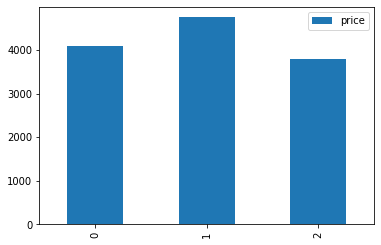

In [ ]:
ax=auto[['make', 'price']][0:3].plot(kind='bar', rot=90)
plt.savefig('fig.pdf') #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff                                         
plt.show()

Text(0, 0.5, 'y label')

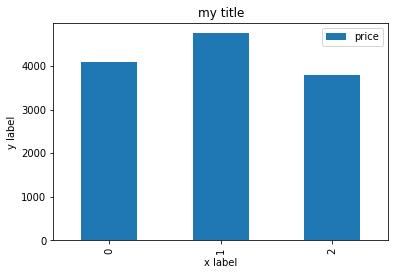

In [ ]:
ax=auto[['make', 'price']][0:3].plot(kind='bar', rot=90, title='my title')
ax.set_xlabel("x label")
ax.set_ylabel("y label")

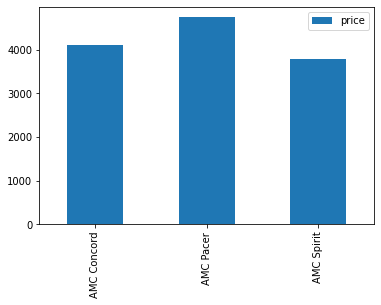

In [ ]:
ax=auto[['make', 'price']][0:3].plot(kind='bar', rot=90)
ax.set_xticklabels(auto.make); plt.show()

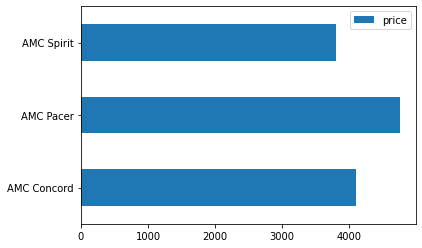

In [ ]:

ax=auto[['make', 'price']][0:3].plot(kind='barh')
ax.set_yticklabels(auto.make); plt.show()

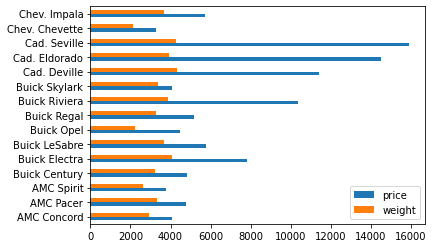

In [ ]:
ax=auto[['make', 'price','weight']][0:15].plot(kind='barh') #stacked=True                                                           
ax.set_yticklabels(auto.make); plt.show()

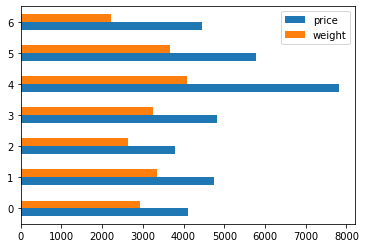

In [ ]:
ax=auto[['make', 'price','weight']][0:7].plot(kind='barh')


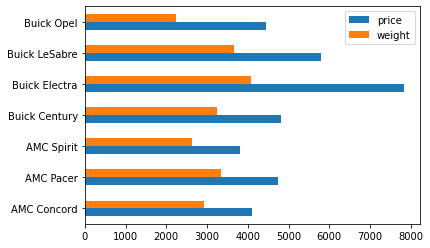

In [ ]:
ax=auto[['make', 'price','weight']][0:7].plot(kind='barh')
ax.set_yticklabels(auto.make); plt.show()

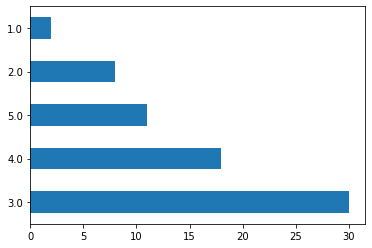

In [ ]:
# counts/freq by cat                                                                                                               
auto.rep78.value_counts().plot(kind='barh')
plt.show()

### histograms                                                                                                                     


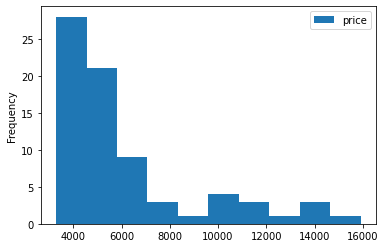

In [ ]:
auto[['price']].plot(kind='hist'); plt.show()


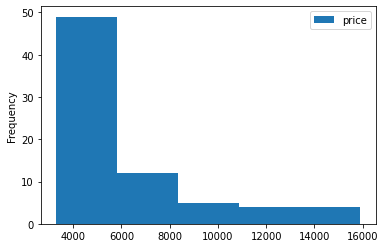

In [ ]:
auto[['price']].plot(kind='hist', bins=5); plt.show()


### scatter plots                                                                                                                  


Text(0.5, 0, 'x-label')

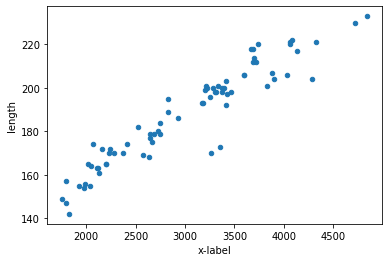

In [ ]:
auto.plot.scatter(x='weight', y='length'); plt.xlabel("x-label"); plt.show() #note that can zoom in etc                                                   


Text(0.5, 1.0, 'title')

Text(0, 0.5, 'y-label')

Text(0.5, 0, 'x-label')

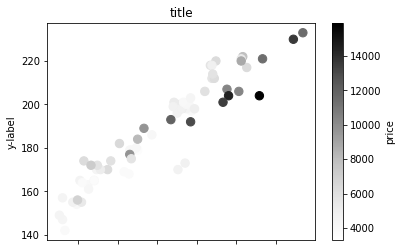

In [ ]:
auto.plot.scatter(x='weight', y='length',c='price', s=70) 
plt.title("title"); plt.ylabel("y-label"); plt.xlabel("x-label")
plt.savefig('fig.pdf')
plt.show()
#this is really neat! 
#a see http://stats.stackexchange.com/questions/11984/how-can-i-remove-the-z-order-bias-of-a-coloured-scatter-plot                                                                                                                              
#i love it! no way to do someting like that in stata! 

       x    y            val
0   2930  186    AMC Concord
1   3350  173      AMC Pacer
2   2640  168     AMC Spirit
3   3250  196  Buick Century
4   4080  222  Buick Electra
..   ...  ...            ...
69  2160  172      VW Dasher
70  2040  155      VW Diesel
71  1930  155      VW Rabbit
72  1990  156    VW Scirocco
73  3170  193      Volvo 260

[74 rows x 3 columns]


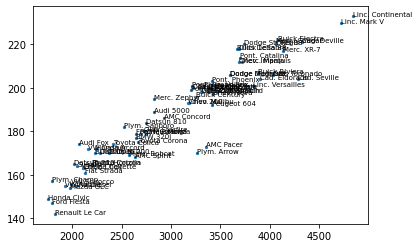

In [ ]:
#label points                                                                                                                      

def label_point_orig(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    print(a)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']),fontsize=7, color='black')

plt.scatter(auto.weight, auto.length,s=5)
label_point_orig(auto.weight, auto.length, auto.make, plt)
plt.show()

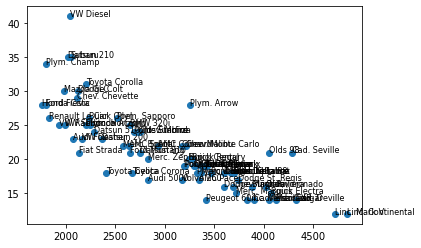

In [ ]:
# another way: scatterplot with labels :)                                                                                          
fig, ax = plt.subplots()
ax.scatter(auto['weight'],auto['mpg'] )

for i, txt in enumerate(auto['make']):
    ax.annotate(txt, (auto['weight'][i],auto['mpg'][i]),fontsize=8)

### box plot                                                                                                                       


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


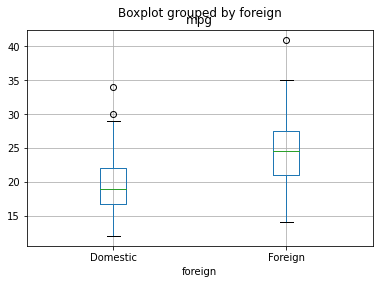

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7ba886b8d0>, None)

In [ ]:
#so crisp so nice!!                                                                                                                
auto.boxplot(column='mpg',by='foreign'), plt.show() #of course foreing have better mpg 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


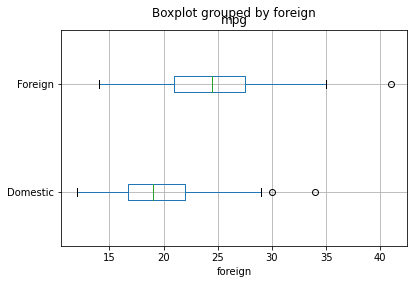

(<matplotlib.axes._subplots.AxesSubplot at 0x7f44c096f790>, None)

In [ ]:
auto.boxplot(column='mpg',by='foreign',vert=False), plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


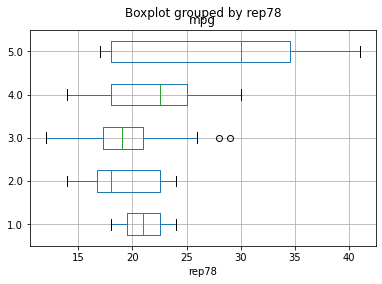

(<matplotlib.axes._subplots.AxesSubplot at 0x7f44c0acddd0>, None)

In [ ]:
auto.boxplot(column='mpg',by='rep78',vert=False), plt.show()


### matplotlib: grids, subplots, and layout [may skip or skim thru]                                                                


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b881449d0>,
      dtype=object)

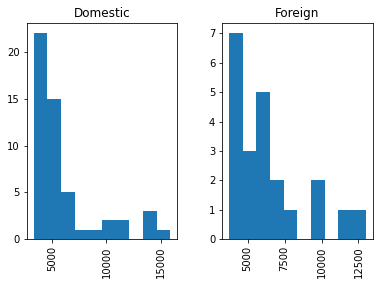

In [ ]:
# sometimes can simply add 'by', but for some plots only                                                                           
auto.price.hist(by=auto.foreign);plt.show()

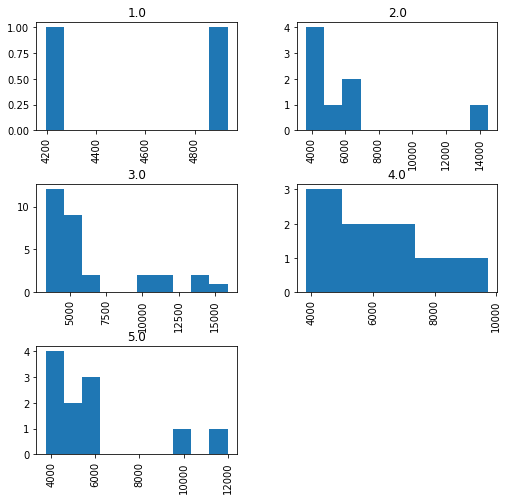

In [ ]:
auto.price.hist(by=auto.rep78, figsize=(8, 8)); plt.show()


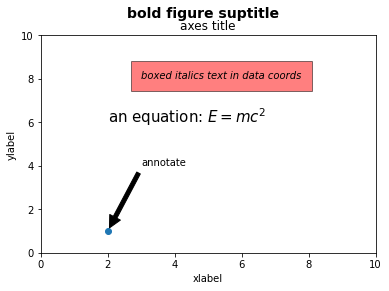

In [ ]:
### first adding text; http://matplotlib.org/users/text_intro.html                                                                 
#note that in stata can add tex too: scatter mpg price, text(20 1000 "hello", color(black)) 


fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111) #1x1grid; 1st plot                                                                                       
#fig.subplots_adjust(top=0.85) #add spaing between title and ax title                                                              
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.plot([2], [1], 'o') #put a point                                                                                                
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4), #put arrow                                                                       
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10]) #axes 0-10                                                                                                 
plt.show()


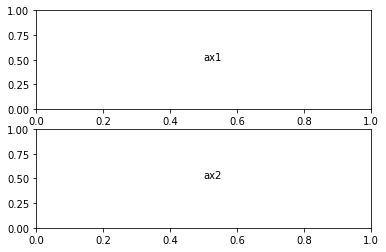

In [ ]:
### second, empty layout                                                                                                           


''' alternative ideas; skip                                                                                                        
plt.subplots(1, 2, figsize=(6, 4)); plt.subplots_adjust(wspace=0.3, hspace=.3);plt.show()                                          
                                                                                                                                   
following: http://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111              
                                                                                                                                   
#eg: 224=2x2 grid,4th subplot;    '234=2x3 grid, 4th subplot                                                                       
fig = plt.figure()                                                                                                                 
fig.add_subplot(221)   #top left                                                                                                   
fig.add_subplot(222)   #top right                                                                                                  
fig.add_subplot(223)   #bottom left                                                                                                
fig.add_subplot(224)   #bottom right                                                                                               
plt.show()                                                                                                                         
                                                                                                                                   
fig = plt.figure()                                                                                                                 
fig.add_subplot(221)   #top left                                                                                                   
fig.add_subplot(222)   #top right                                                                                                  
fig.add_subplot(224)   #bottom right                                                                                               
plt.show()                                                                                                                         
'''
fig = plt.figure()
ax1 = plt.subplot2grid((2,1), (0,0)); ax1.text(.5,.5,'ax1') #2x1grid; 0,0 graph                                                    
ax2 = plt.subplot2grid((2,1), (1,0)); ax2.text(.5,.5,'ax2') #2x1grid; 1,0 graph                                                    
plt.show()

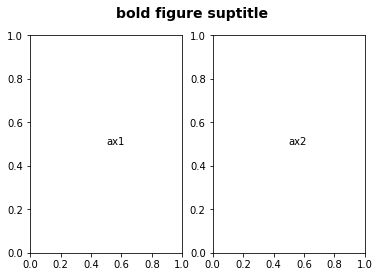

In [ ]:
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax1 = plt.subplot(121) ; ax1.text(.5,.5,'ax1') #1x2grid 1st graph                                                                  
ax2 = plt.subplot(122) ; ax2.text(.5,.5,'ax2') #1x2grid 2nd graph                                                                  
plt.show()

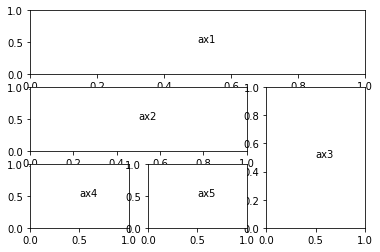

In [ ]:
#asymmetrical arrangements http://matplotlib.org/users/gridspec.html                                                               
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3); ax1.text(.5,.5,'ax1')
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2); ax2.text(.5,.5,'ax2')
ax3 = plt.subplot2grid((3,3), (1, 2), rowspan=2); ax3.text(.5,.5,'ax3')
ax4 = plt.subplot2grid((3,3), (2, 0)); ax4.text(.5,.5,'ax4')
ax5 = plt.subplot2grid((3,3), (2, 1)); ax5.text(.5,.5,'ax5')
plt.show()

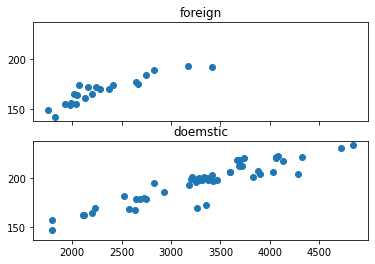

In [ ]:
## native matplotlib syntax for graphing                                                                                           

fig = plt.figure()
plt.subplots_adjust(hspace=0.2) #adjust horiz space between graphs                                                                 

ax1 = plt.subplot(211, title='foreign') #2x1grid 1st graph                                                                         
plt.scatter(auto[auto.foreign=='Foreign'].weight, auto[auto.foreign=='Foreign'].length)

ax2 = plt.subplot(212, sharex=ax1, sharey=ax1, title='doemstic') #2x1grid 2nd graph                                                
plt.scatter(auto[auto.foreign=='Domestic'].weight, auto[auto.foreign=='Domestic'].length)

xticklabels = ax1.get_xticklabels() #+ ax2.get_xticklabels() #drop labelling of 1st x axis                                         
plt.setp(xticklabels, visible=False)
plt.show()

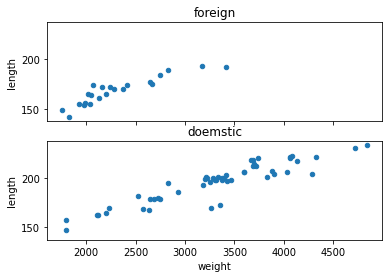

In [ ]:
## pandas syntax for graphing                                                                                                      

fig = plt.figure()
plt.subplots_adjust(hspace=0.2) #adjust horiz space between graphs                                                                 

ax1 = plt.subplot(211, title='foreign') #2x1grid 1st graph                                                                         
auto[auto.foreign=='Foreign'].plot(ax=ax1, kind='scatter', x='weight', y='length')

ax2 = plt.subplot(212, sharex=ax1, sharey=ax1, title='doemstic') #2x1grid 2nd graph                                                
auto[auto.foreign=='Domestic'].plot(ax=ax2,kind='scatter', x='weight', y='length')

xticklabels = ax1.get_xticklabels() #+ ax2.get_xticklabels() #drop labelling of 1st x axis                                         
plt.setp(xticklabels, visible=False)
plt.show()

Text(0.5, 0, 'weight')

Text(0.5, 0, 'length')

Text(0.5, 0, 'mpg')

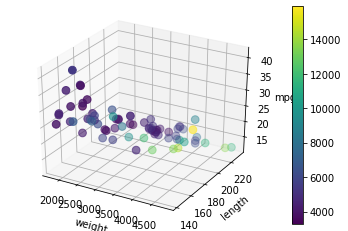

In [ ]:
####fancy!                                                                                                                         

###3d                                                                                                                              

from mpl_toolkits.mplot3d import Axes3D

#run this in regular console, not Ipython so that can pop up and zoom in!                                                          
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(auto.weight, auto.length, auto.mpg, s=60, c=auto.price)
ax.set_xlabel("weight")
ax.set_ylabel("length")
ax.set_zlabel("mpg")
fig.colorbar(p) #add colbar                                                                                                        
plt.show() #fancy but perhaps not very useful   

### cute lines
http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/

Percentage of Bachelor's degrees conferred to women in the U.S.A


## graphs: seaborn

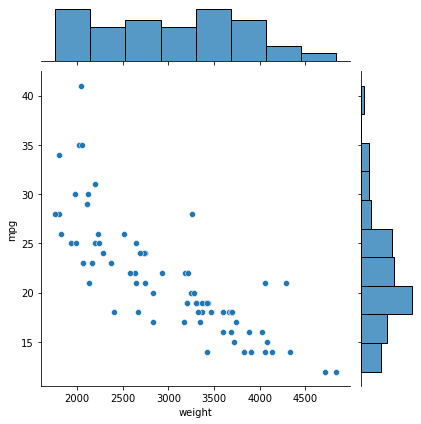

In [ ]:
import pandas as pd
import seaborn as sns
%matplotlib inline
auto = 'http://www.stata-press.com/data/r15/auto2.dta'
df = pd.read_stata(auto)
sns.jointplot(x='weight',y='mpg',data=df, kind='scatter') #nice! one of my fav!

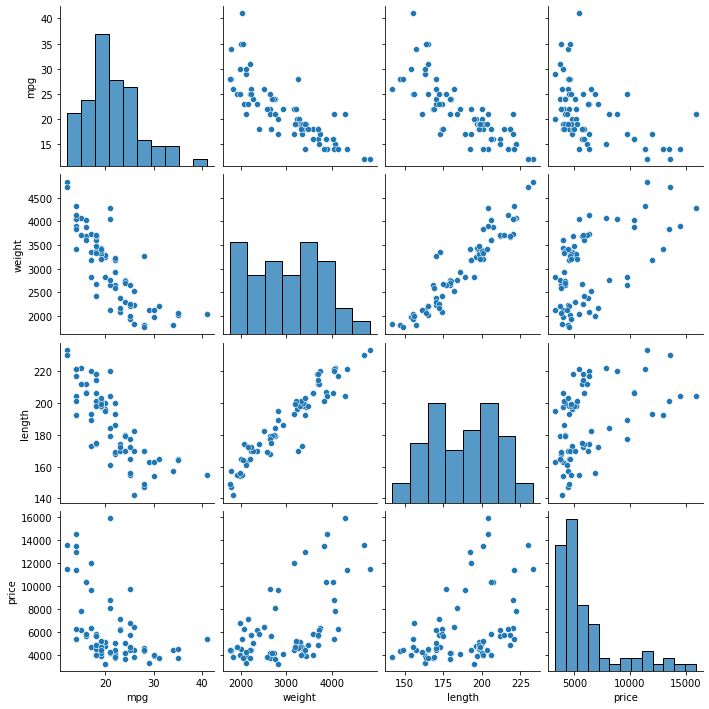

In [ ]:
sns.pairplot(df[['mpg','weight','length','price']])

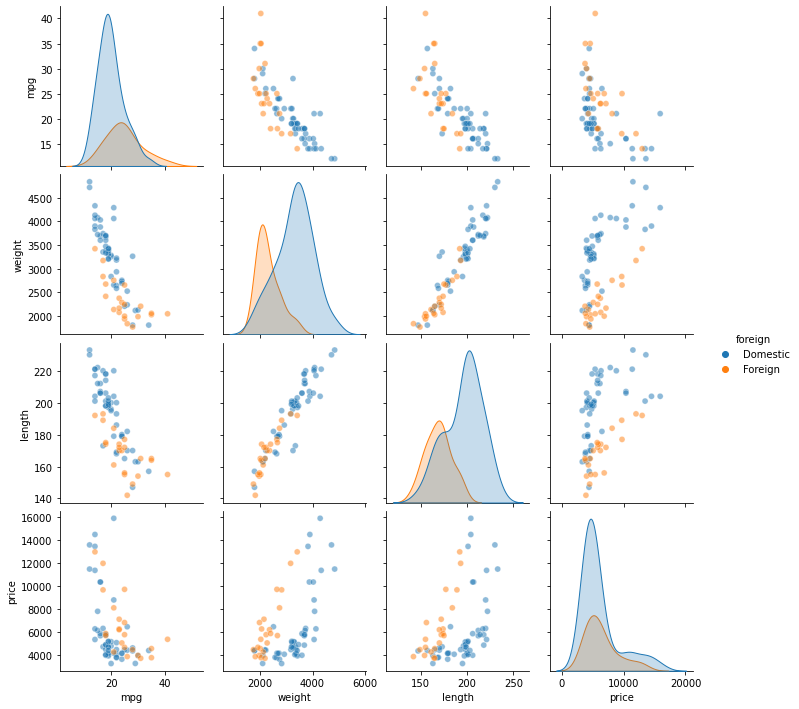

In [ ]:
sns.pairplot(df[['mpg','weight','length','price','foreign']],
             kind='scatter', plot_kws={'alpha': 0.5}, 
             hue='foreign')

## maps

### foilum 
[TODO: expand, elaborate, polish]

In [ ]:
os.chdir('/content')
os.getcwd()

'/content'

In [ ]:
import folium as f

In [ ]:
f.Map(location=[45.5236, -122.6750]) #open street map is default                            
#m.save('m7.html')                   
#webbrowser.get('firefox').open_new_tab('m.html') #; webbrowser.open('m.html')                   


In [ ]:
geolocator = Nominatim()
location = geolocator.geocode("401 cooper st camden nj")
print(location.address)

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


401, Cooper Street, Downtown, Camden, Camden County, New Jersey, 08102, United States


In [ ]:
print((location.latitude, location.longitude))

(39.94727470588235, -75.12232741176472)


In [ ]:
place = geolocator.geocode("camden nj") #first geocode location                                          
place

Location(Camden, Camden County, New Jersey, 08102, United States, (39.9448402, -75.1198911, 0.0))

In [ ]:
f.Map(location=place[1])

In [ ]:
f.Map(location=place[1], tiles='Stamen Toner', zoom_start=16)

In [ ]:
f.Map(location=place[1], tiles='Stamen Terrain', zoom_start=6)

In [ ]:
###adding markup by hand--easy! good for few u/a                                                
m = f.Map(location=geolocator.geocode("401 cooper st camden nj")[1], zoom_start=14)
m.add_child(f.Marker(geolocator.geocode("401 cooper st camden nj 08120")[1], popup='DPPA'))
m.add_child(f.Marker(geolocator.geocode("321 cooper st camden nj 08102" )[1], popup='bbb'))
#m.add_child(f.CircleMarker(geolocator.geocode("waterfront camden nj")[1], popup='waterfront'))          


In [ ]:
'''can pick color, icon                                                                         
icons: http://www.w3schools.com/icons/bootstrap_icons_glyphicons.asp                            
colors: http://www.w3schools.com/colors/colors_names.asp                                        
'''
m = f.Map(location=geolocator.geocode("401 cooper st camden nj")[1], zoom_start=14)
m.add_child(f.Marker(geolocator.geocode("401 cooper st camden nj")[1],
                     popup='i love this place!',icon = f.Icon(icon = 'cloud' ,color = 'green')))
m.add_child(f.CircleMarker(geolocator.geocode("2 Riverside Dr, Camden, NJ 08103")[1], popup='waterfront'\
,color='#8A2BE2',fill_color='#F0F8FF'))
m.save('m8.html')

'can pick color, icon                                                                         \nicons: http://www.w3schools.com/icons/bootstrap_icons_glyphicons.asp                            \ncolors: http://www.w3schools.com/colors/colors_names.asp                                        \n'

In [ ]:
### many points, clustering, USEFUL! fancy!                                                     

#http://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/                     

urllib.request.urlretrieve('https://raw.githubusercontent.com/devanshmanu/StravAdd/master/SFPD_Incidents_-_Current_Year__2015_.csv', "SFPD_Incidents_-_Current_Year__2015_.csv")

crimedata = pd.read_csv('SFPD_Incidents_-_Current_Year__2015_.csv')

len(crimedata)

#crimedata[1:3]


('SFPD_Incidents_-_Current_Year__2015_.csv',
 <http.client.HTTPMessage at 0x7f7b88614f90>)

112331

In [ ]:
#for speed purposes                                                                             
MAX_RECORDS = 1000

#create empty map zoomed in on San Francisco                                                    
m = f.Map(location=(37.76, -122.45), zoom_start=12)

loc = []
#add a marker for every record in the filtered data, use a clustered view                       
for each in crimedata[0:MAX_RECORDS].iterrows():
    loc.append([each[1]['Y'],each[1]['X']])


loc[1:3]


m.add_children(MarkerCluster(locations=loc))
m.save('m10.html')
#very cool! hover over it--pups u in blue a polygon that the aggregate refers to!               


[[37.7126165766239, -122.413676487435], [37.7126165766239, -122.413676487435]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  app.launch_new_instance()


In [ ]:
### heatmap http://www.jackboot7.com/visualizing-tweets.html                                    

m = f.Map(location=(37.76, -122.45), zoom_start=12)
m.add_children(HeatMap(loc))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  after removing the cwd from sys.path.


#### polygons


In [ ]:
#adding geojson
map = f.Map()
map

In [ ]:
f.GeoJson('https://raw.githubusercontent.com/datasets/geo-admin1-us/master/data/admin1-us.geojson').add_to(map)
map

In [ ]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 36.8 MB/s 
     |████████████████████████████████| 6.3 MB 38.8 MB/s 


In [ ]:
import geopandas as gpd
states = gpd.read_file(state_geo)
print(states.head())

   id        name                                           geometry
0  AL     Alabama  POLYGON ((-87.35930 35.00118, -85.60667 34.984...
1  AK      Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  AZ     Arizona  POLYGON ((-109.04250 37.00026, -109.04798 31.3...
3  AR    Arkansas  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  CA  California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...


In [ ]:
state_data.head(50)

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1
5,CO,7.7
6,CT,8.4
7,DE,7.1
8,FL,8.2
9,GA,8.8


In [ ]:
m = f.Map(location=[40, -95], zoom_start=4)
m

In [ ]:
f.Choropleth(
    geo_data=state_geo, #geo data obj: state_geo
    name="choropleth",
    data=state_data,   #regular data object
    columns=["State", "Unemployment"], # 1st var is join or merge var; 2nd is map var
    key_on="feature.id",  #this is merge/join var from geojson; just prefix ith 'feature
    fill_color="YlGnBu", #pick some color, opacities
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Unemployment Rate (%)",
).add_to(m)

f.LayerControl().add_to(m)

m
#m.save('m2.html')

##notes to myself:

apr2022 need to reorganize and polish this; little messy

do more data mgmt like merge, recode, collapse, already in other py or notebooks!!!

### TODO for descriptive stats
add examples for crosstabs maybe from auto from pandasSimpleForResearchMethods.py or make sth up like quadratic happiness across urbanicity in china etc

and add more stats and graphs like  boxplots etc
https://datacarpentry.org/python-socialsci/13-matplotlib/index.html

In [ ]:
#example to load data
file="/content/Untitled spreadsheet - Sheet1.csv"
myData=pd.read_csv(file)
myData

,name,income
0,joe,20
1,becky,30
2,jack,10


##references                                                                                                  


### SAVING CSV ONLINE                                                                                                              
for your own dataset can just save as csv somewhere online and feed the link like this                                             
just upload to google drive and share it, and cp file id, eg:                                                                      
1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8                                                                                                  
and put into                                                                                                                       
https://drive.google.com/uc?id=FILE-ID-GOES-HERE&export=download                                                                   
                                                                                                                                   
eg:                                                                                                                               
url="https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download"                                             
dat=pd.read_csv(url)                                                                                                               
 ### NOTEBOOKS                                                                                                                      
a ton of free online shells or notebooks eg:                                                                                       
                                                                                                                                   
super simple shell:                                                                                                                
https://www.python.org/shell/                                                                                                      
                                                                                                                                   
notebook:                                                                                                                          
https://cocalc.com/projects/2ad3cb5d-fc12-479b-993c-e62c1e68071a/files/Welcome%20to%20CoCalc.ipynb?session=default                 
                                                                                                                                   
and notably google's colab (need to have goog acct):                                                                               
https://colab.research.google.com/drive/1mJo0sJYI58rG63-IEjUOEFE_txQI9q3T                                                          
                                                                                                                                   
this would load your code from url, say github                                                                                     
https://notebooks.gesis.org/binder/ 


### bar charts
https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
